In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re, emoji, itertools
from sklearn.model_selection import train_test_split 

In [23]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [24]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [25]:
TRAIN_DATA_PATH = r"..\data\train.csv"
TEST_DATA_PATH = r"..\data\test.csv"

In [26]:
df_train = pd.read_csv(TRAIN_DATA_PATH)
df_test = pd.read_csv(TEST_DATA_PATH)

In [27]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"thx"   : "thanks"
}

In [28]:
def remove_contractions(text):
    return contractions[text.lower()] if text.lower() in contractions.keys() else text

In [29]:
df_train['text']=df_train['text'].apply(remove_contractions)
df_test['text']=df_test['text'].apply(remove_contractions)

In [30]:
# Step - a : Remove blank rows if any.
df_train['text'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
df_train['text'] = [entry.lower() for entry in df_train['text']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
df_train['text']= [word_tokenize(entry) for entry in df_train['text']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df_train['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df_train.loc[index,'text_final'] = str(Final_words)

In [31]:
df_train

,id,keyword,location,text,target,text_final
0,1,NaN,NaN,"[our, deeds, are, the, reason, of, this, #, ea...",1,"['deed', 'reason', 'earthquake', 'may', 'allah..."
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, ., canada]",1,"['forest', 'fire', 'near', 'la', 'ronge', 'sas..."
2,5,NaN,NaN,"[all, residents, asked, to, 'shelter, in, plac...",1,"['resident', 'ask', 'place', 'notify', 'office..."
3,6,NaN,NaN,"[13,000, people, receive, #, wildfires, evacua...",1,"['people', 'receive', 'wildfire', 'evacuation'..."
4,7,NaN,NaN,"[just, got, sent, this, photo, from, ruby, #, ...",1,"['get', 'send', 'photo', 'ruby', 'alaska', 'sm..."
...,...,...,...,...,...,...
7608,10869,NaN,NaN,"[two, giant, cranes, holding, a, bridge, colla...",1,"['two', 'giant', 'crane', 'hold', 'bridge', 'c..."
7609,10870,NaN,NaN,"[@, aria_ahrary, @, thetawniest, the, out, of,...",1,"['thetawniest', 'control', 'wild', 'fire', 'ca..."
7610,10871,NaN,NaN,"[m1.94, [, 01:04, utc, ], ?, 5km, s, of, volca...",1,"['utc', 'volcano', 'hawaii', 'http']"
7611,10872,NaN,NaN,"[police, investigating, after, an, e-bike, col...",1,"['police', 'investigate', 'collided', 'car', '..."


In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_train["text_final"],df_train["target"])

In [33]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(y_train)
Test_Y = Encoder.fit_transform(y_test)

In [34]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df_train['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)


In [38]:
from sklearn import metrics

# Naive Bayes

In [36]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  80.5672268907563


Model test:
		Prec: 0.8573551263001485         
		 Rec: 0.6780258519388954         
		 F1: 0.7572178477690288         
		 Acc: 0.805672268907563


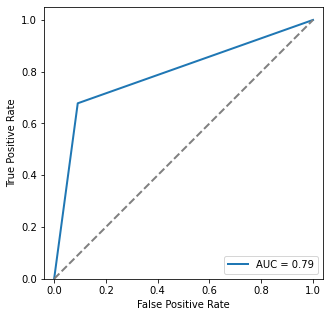

In [41]:
print('Model test:')

print(f'\t\tPrec: {metrics.precision_score(Test_Y, predictions_NB)} \
        \n\t\t Rec: {metrics.recall_score(Test_Y, predictions_NB)} \
        \n\t\t F1: {metrics.f1_score(Test_Y, predictions_NB)} \
        \n\t\t Acc: {metrics.accuracy_score(Test_Y, predictions_NB)}')

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_NB)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot(fpr, tpr, lw=2, label="AUC = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [43]:
# Step - a : Remove blank rows if any.
df_test['text'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
df_test['text'] = [entry.lower() for entry in df_test['text']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
df_test['text']= [word_tokenize(entry) for entry in df_test['text']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df_test['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df_test.loc[index,'text_final'] = str(Final_words)

In [52]:
df_test.shape

(3263, 5)

In [47]:
Test_X_Tfidf_subm = Tfidf_vect.transform(df_test['text_final'])

In [57]:
Test_X_Tfidf_subm

<3263x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 24032 stored elements in Compressed Sparse Row format>

In [66]:
submission_NB = Naive.predict(Test_X_Tfidf_subm)
submission_NB = pd.DataFrame(submission_NB)
tmp = pd.concat([df_test,submission_NB],axis = 1 )
tmp = tmp.drop(["text","keyword","location","text_final"],axis = 1)
tmp.columns = ['id', "target"]
tmp.to_csv("submissionNB.csv",index = False)


In [60]:
submission_NB.size

3263

# SVM

In [39]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  79.51680672268907


Model test:
		Prec: 0.8424962852897474         
		 Rec: 0.6662749706227967         
		 F1: 0.7440944881889763         
		 Acc: 0.7951680672268907         
		 ROC_AUC: 0.7828051016456814


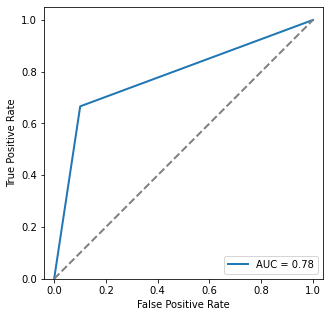

In [40]:
print('Model test:')

print(f'\t\tPrec: {metrics.precision_score(Test_Y, predictions_SVM)} \
        \n\t\t Rec: {metrics.recall_score(Test_Y, predictions_SVM)} \
        \n\t\t F1: {metrics.f1_score(Test_Y, predictions_SVM)} \
        \n\t\t Acc: {metrics.accuracy_score(Test_Y, predictions_SVM)} \
        \n\t\t ROC_AUC: {metrics.roc_auc_score(Test_Y, predictions_SVM)}')

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_SVM)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot(fpr, tpr, lw=2, label="AUC = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [67]:
submission_SVM = SVM.predict(Test_X_Tfidf_subm)
submission_SVM = pd.DataFrame(submission_SVM)
tmp = pd.concat([df_test,submission_NB],axis = 1 )
tmp = tmp.drop(["text","keyword","location","text_final"],axis = 1)
tmp.columns = ['id', "target"]
tmp.to_csv("submissionSVM.csv",index = False)